# Introduzione

Replichiamo ora l'esperimeno di Buffon. Esso consiste nel ricavare una stima di $\pi$ con un metodo statistico. In particolare, scelta una griglia di gioco, la probabilità di colpire una linea della griglia lanciando una sbarra casualemente dipende dal valore di $\pi$. E' possibile quindi invertire tale relazione per ottenere la seguente espressione: 
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$

Quello di cui abbiamo bisogno è quindi simulare il lancio di una sbarra di lunghezza $L=0.75$ e calcolare il numero di volte che questa si posiziona su una linea del reticolo. Per farlo ho seguito la seguente strategia:
* Considerero l'intervallo compreso fra due linee verticali con coordinate $(0,0)$ e $(1,0)$. Estraggo un numero pseudo-casuale in $x_{estremo_1} \in(0,1)$ che descrive un'estremità della barretta.
* Per ottenere l'altra estremità dovrei descrive l'orientazione della sbarretta, ossia dovrei estrarre l'angolo $\theta \in (0,2\pi)$ che forma con le ascisse per poi calcolare:  
$$x_{estremo_2}=x_{estremo_1}+L\cdot\cos(\theta)$$
Chiaramente per eseguire questa operazione sarebbe necessario conoscere a priori il valore di $\pi$ e questo non è possibile nel nostro gioco. Tuttavia, non ho individuato altri modo intelligenti per risolvere il problema.
* Posso ora determinare se la sbarra ha intercettato o meno le linee a seconda del punto $x_{estremo_2}$. Infatti se esso è maggiore di $1$ o minore di $0$ allora vuol dire che ha colpito una delle due linee. 
* Eseguo $1000$ lanci per ottenere una sola stima di $\pi$. Dopodichè ripeto questa procedura $10^4$ volte così da ottenere $10^4$ stime indipendenti di $\pi$.
* Per analizzare questi valori di $\pi$ eseguo medie su blocchi di $10^2$ valori di $\pi$. Ho così un vettore di $10^2$ valori di $\bar \pi$.
* Con questi dati, eseguo poi la media di un numero crescenti di $\bar \pi$ dell'array verificando che converga al valore atteso 3.1415926536. 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import string
from scipy.optimize import curve_fit

import seaborn as sns
sns.set_theme(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1.2, color_codes=True, rc=None)

In [2]:
# Carico i dati dai file

file_mean= "Exercises_01.3/file_mean.txt"

mean_data, std_mean =np.loadtxt(file_mean,delimiter = ",", unpack = True)
number_throws = np.shape(mean_data)[0]

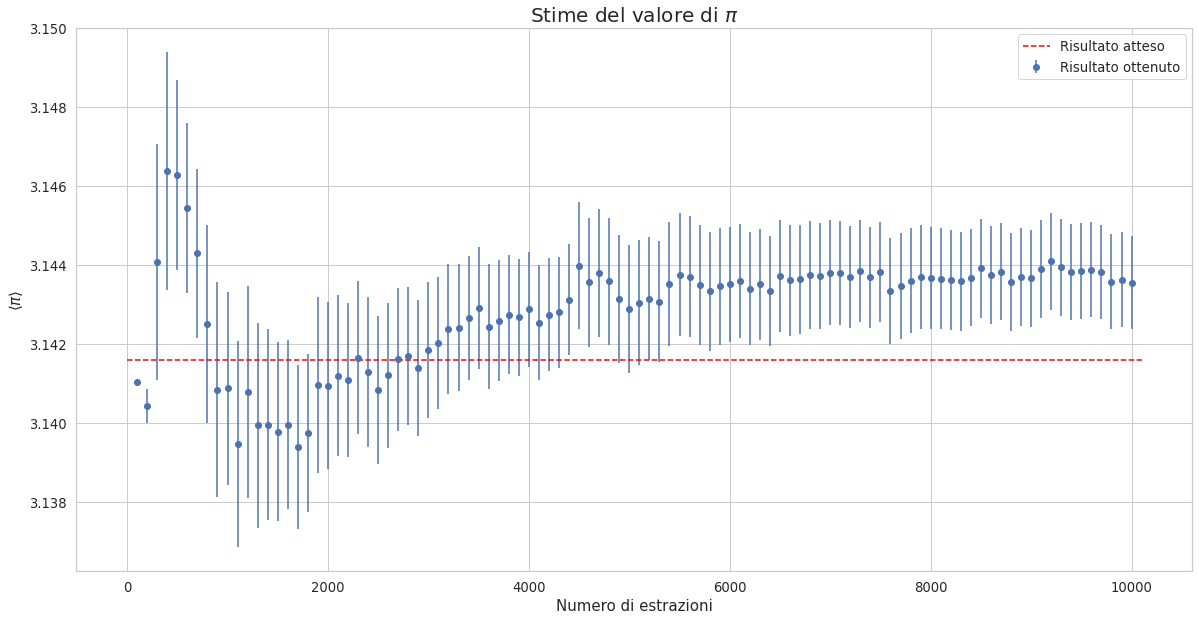

In [3]:
fig, ax1 = plt.subplots(1, 1, figsize=(20,10))

ax1.errorbar(
    np.arange(1,(number_throws+1))*100,
    mean_data,
    yerr = std_mean,  
    marker='o', linestyle="", label='Risultato ottenuto'
);

ax1.hlines(np.pi,0,(number_throws+1)*100, colors='red', linestyle='--', label='Risultato atteso');
ax1.grid(True)

ax1.set_title(f"Stime del valore di $\pi$",  fontsize=20);

ax1.set_xlabel(r"Numero di estrazioni",  fontsize=15);
ax1.set_ylabel(r"$ \langle \pi \rangle  $" ,  fontsize=15);
ax1.legend(frameon=True);

> Vediamo che il valore ottenuto si approssima bene a quello teorico sebbene dobbiamo ricordare che abbiamo usato il valore di $\pi$ per ricavarlo.